In [1]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline
#%matplotlib

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# 플롯 폰트 패밀리를 Arial로 설정
plt.rcParams['font.family'] = 'NanumGothic'
# 수학 텍스트 굵게 및 이탤릭체 폰트 패밀리를 Arial로 설정
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'NanumGothic:bold'
matplotlib.rcParams['mathtext.it'] = 'NanumGothic:italic'

In [4]:
# number of tickets per month
X = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Y = [160, 180, 250, 140, 175, 150, 125, 156, 126, 104, 124, 140] # processed
Z = [160, 180, 255, 140, 175, 160, 135, 202, 160, 139, 149, 177] # received

Text(-1.6, -88, '데이터 출처: 회사 고객대응 시스템, 2024년 2월 26일 기준 | 인당 처리된 처리건수과\n해결 시간에 대한 자세한 분석을 통해 필요한 추가 정보를 제공할 수 있습니다.')

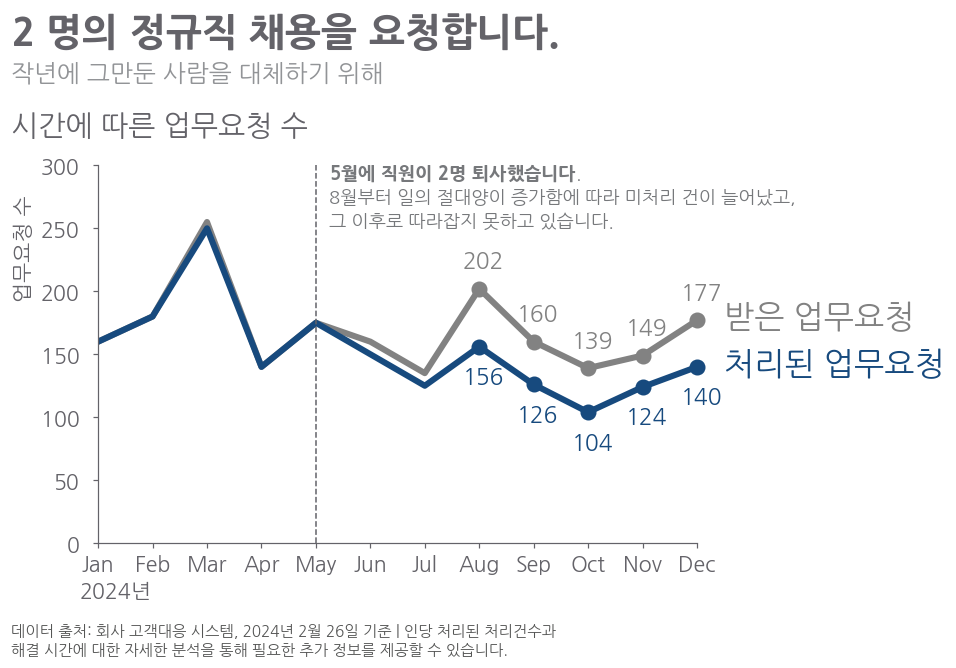

In [26]:
# 새로운 그림 생성
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), # 가로, 세로 (인치 단위)
                        dpi=110)             # 그림 해상도

# 그림 레이아웃 조정
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)

# 마커와 함께 받은 업무요청 라인 그리기
ax1.plot(range(12), Z, linewidth=4, color=GRAY6)
ax1.scatter(range(12)[-5:], Z[-5:], s=90, color=GRAY6, clip_on=False)

# 마커와 함께 처리된 업무요청 라인 그리기
ax1.plot(range(12), Y, linewidth=4, color=BLUE1)
ax1.scatter(range(12)[-5:], Y[-5:], s=90, color=BLUE1, clip_on=False)

# 받은 업무요청에 주석 달기
for i, v in enumerate(Z[-5:]):
    ax1.annotate(str(v),
                 (i+7, v),                    # 주석을 달 좌표 (x,y)
                 xytext=(-11, 14),            # 텍스트 위치 (x,y)
                 textcoords='offset points',  # 오프셋 (포인트 단위)
                 color=GRAY6,
                 fontsize=15)

# 처리된 업무요청에 주석 달기
for i, v in enumerate(Y[-5:]):
    ax1.annotate(str(v),
                 (i+7, v),                   # 주석을 달 좌표 (x,y)
                 xytext=(-11, -24),          # 텍스트 위치 (x,y)
                 textcoords='offset points', # 오프셋 (포인트 단위)
                 color=BLUE1,
                 fontsize=15)


# y축과 x축의 데이터 한도 설정
ax1.set_xlim([0, 11])
ax1.set_ylim([0, 300])

# 축 객체의 속성 설정
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X,
         yticks=list(range(0, 350, 50)))

# x, y 축 눈금 레이블 모양 설정
for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(14)
    i.set_color(GRAY4)

# y축 눈금 레이블을 왼쪽으로 약간 이동
for item in ax1.get_yticklabels():
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# 눈금, 눈금 레이블, 그리드 선의 모양 변경
ax1.tick_params(bottom='off')

# 눈금과 축의 색상 변경
ax1.tick_params(color=GRAY4)
ax1.spines['bottom'].set_color(GRAY4)
ax1.spines['left'].set_color(GRAY4)

# 차트 테두리 제거
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# 수직 참조선 추가
plt.axvline(x=4, ymax=1, color='#636369', linewidth=1, linestyle = '--' )

# 선 바로 라벨링
ax1.text(11.5, 172, '받은 업무요청', fontsize='21', color=GRAY6)
ax1.text(11.5, 135, '처리된 업무요청', fontsize='21', color=BLUE1)


# 축에 제목 추가
ax1.text(-1.6, 325, '시간에 따른 업무요청 수', fontsize=19, color=GRAY4)
ax1.text(-1.55, 195, '업무요청 수', fontsize=14, rotation='vertical',
         color=GRAY4)
ax1.text(-0.34, -43, '2024년', fontsize=14, color=GRAY4)

# 플롯에 제목 추가
ax1.text(-1.6, 397, '$\\bf{2\ 명의\ 정규직\ 채용을\ 요청합니다.}$',
         fontsize=25, color=GRAY4)
ax1.text(-1.6, 368, '작년에 그만둔 사람을 대체하기 위해',
         fontsize=16, color=GRAY7)

# 더 많은 정보적 텍스트 추가
ax1.text(4.24, 252,
         '$\\bf{5월에\ 직원이\ 2명\ 퇴사했습니다}$. \n'
         '8월부터 일의 절대양이 증가함에 따라 미처리 건이 늘어났고,\n그 이후로 따라잡지 못하고 있습니다.',
         fontsize=12, color=GRAY5, linespacing=1.4)

# 플롯에 데이터 출처 주석 추가
ax1.text(-1.6, -88,
         '데이터 출처: 회사 고객대응 시스템, 2024년 2월 26일 기준 | 인당 처리된 처리건수과\n'
         '해결 시간에 대한 자세한 분석을 통해 필요한 추가 정보를 제공할 수 있습니다.',
         fontsize=10, color=GRAY3, linespacing=1.3)
